# D-optimal experiment design: comparing ABPG and Frank-Wolfe
Solve the D-Optimal experiment design problem
$$
\begin{array}{ll}
\textrm{minimize}   & F(x):=\log\left(\det\left(\sum_{i=1}^n x_i V_i V_i^T\right)\right) \\
\textrm{subject to} & \sum_{i=1}^n x_i = 1, \\ 
                    & x_i\geq 0, \quad i=1,\ldots,n
\end{array}
$$
where $V_i\in R^m$ for $i=1,\ldots,n$.

Methods compared:
* Original Frank-Wolfe method
* Frank-Wolfe method with away steps
* Bregman Proximal Gradient (BPG) method with adaptive line search
* Accelerated Bregman Proximal Gradient (ABPG) method with gain adaption

In [1]:
cd  C:\\github\accbpg

C:\github\accbpg


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'serif'})
#matplotlib.rcParams.update({'text.usetex': True})

import accbpg

In [3]:
n = 1000
m = [100, 200, 300, 400, 500, 600, 700, 800, 900]
#n = 100
#m = [10, 50, 80]
K = 3
eps = ['1e-3', '1e-4', '1e-5', '1e-6', '1e-7', '1e-8']

Nmax = 20000
Nskip = int(Nmax/10)

Ieps = dict()
Teps = dict()
for s in eps:
    Ieps[s] = np.zeros((4, len(m), K))
    Teps[s] = np.zeros((4, len(m), K))

for i in range(len(m)):
    print("\n********** m = {0:d}, n = {1:d} **********".format(m[i], n))
    for k in range(K):
        f, h, L, x0Kh = accbpg.D_opt_design(m[i], n)
        x0KY = accbpg.D_opt_KYinit(f.H)
        x0Mx = (1-1e-3)*x0KY + 1e-3*x0Kh

        _, F_FWKY, _, _, T_FWKY = accbpg.D_opt_FW(f.H, x0KY, 1e-8, maxitrs=Nmax, verbskip=Nskip)
        _, F_WAKY, _, _, T_WAKY = accbpg.D_opt_FW_away(f.H, x0KY, 1e-8, maxitrs=Nmax, verbskip=Nskip)
        _, F_LSKh, _, T_LSKh = accbpg.BPG(f, h, L, x0Kh, maxitrs=Nmax, linesearch=True, ls_ratio=1.5, verbskip=Nskip)
        _, F_ABKh, _, _, _, T_ABKh = accbpg.ABPG_gain(f, h, L, x0Kh, gamma=2, maxitrs=Nmax, ls_inc=1.5, ls_dec=1.5, restart=True, verbskip=Nskip)

        Fmin = min(F_FWKY.min(), F_WAKY.min(), F_LSKh.min(), F_ABKh.min())
        F = [F_FWKY, F_WAKY, F_LSKh, F_ABKh]
        T = [T_FWKY, T_WAKY, T_LSKh, T_ABKh]
        for s in eps:
            for j in range(len(F)):
                I_eps = np.nonzero(F[j] - Fmin <= float(s))
                if len(I_eps[0]) > 0:
                    i_eps = I_eps[0][0]
                    t_eps = T[j][i_eps]
                else:
                    i_eps = Nmax + 1
                    t_eps = T[j][-1]
                Ieps[s][j,i,k] = i_eps
                Teps[s][j,i,k] = t_eps


********** m = 100, n = 1000 **********

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   2.124e+01   2.181e+00   2.811e-01     0.0
  2000  -1.555e+00   1.723e-02   3.038e-01     0.3
  4000  -1.725e+00   1.009e-02   2.944e-01     0.7
  6000  -1.798e+00   7.361e-03   2.869e-01     1.0
  8000  -1.840e+00   5.759e-03   2.819e-01     1.3
 10000  -1.868e+00   4.882e-03   2.792e-01     1.5
 12000  -1.888e+00   4.177e-03   2.764e-01     1.8
 14000  -1.904e+00   3.697e-03   2.743e-01     2.0
 16000  -1.916e+00   3.252e-03   2.725e-01     2.4
 18000  -1.926e+00   2.924e-03   2.710e-01     2.8

Solving D-opt design problem using Frank-Wolfe method with away steps
     k      F(x)     pos_slack   neg_slack    time
     0   2.124e+01   2.181e+00   2.811e-01     0.0
  2000  -2.045e+00   7.112e-04   7.098e-04     0.6
  4000  -2.045e+00   3.861e-06   4.047e-06     1.3
  6000  -2.045e+00   3.455e-08   3.423e-08     1.9

BPG_LS method fo

 12000   1.870e+01   3.664e-03   1.776e-01     3.3
 14000   1.869e+01   3.183e-03   1.747e-01     3.8
 16000   1.868e+01   2.867e-03   1.725e-01     4.3
 18000   1.867e+01   2.592e-03   1.706e-01     4.8

Solving D-opt design problem using Frank-Wolfe method with away steps
     k      F(x)     pos_slack   neg_slack    time
     0   5.348e+01   1.508e+00   2.002e-01     0.0
  2000   1.857e+01   1.109e-03   1.119e-03     1.2
  4000   1.857e+01   2.740e-06   2.832e-06     2.3
  6000   1.857e+01   1.050e-08   1.053e-08     3.4

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   2.231e+01   6.667e-01     0.0
  2000   1.858e+01   1.317e-01    52.0
  4000   1.858e+01   1.317e-01   104.4
  6000   1.858e+01   8.779e-02   154.0
  8000   1.857e+01   8.779e-02   203.9
 10000   1.857e+01   1.317e-01   253.6
 12000   1.857e+01   8.779e-02   303.8
 14000   1.857e+01   1.317e-01   353.7
 16000   1.857e+01   8.779e-02   404.1
 18000   1.857e+01   1.317e


BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   5.050e+01   6.667e-01     0.0

ABPG_gain method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta         Gk         TSG       D(x+,y)     D(z+,z)      Gavg       time
     0   5.050e+01   1.000e+00   6.667e-01   1.000e+00   4.692e-01   4.692e-01   8.165e-01     0.0

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   8.577e+01   1.807e+00   1.577e-01     0.0
  2000   4.868e+01   1.472e-02   1.778e-01     1.0
  4000   4.856e+01   8.239e-03   1.646e-01     2.0
  6000   4.851e+01   5.874e-03   1.559e-01     3.0
  8000   4.848e+01   4.483e-03   1.498e-01     3.9
 10000   4.847e+01   3.609e-03   1.452e-01     4.8
 12000   4.846e+01   3.001e-03   1.417e-01     5.8
 14000   4.845e+01   2.565e-03   1.387e-01     6.7
 16000   4.844e+01   2.253e-03   1.362e-01     7.7
 18000   4.844e+01   2.005e-03   1.339e-01     8.6

  2000   1.538e+02   9.025e-03   8.160e-02    10.2
  4000   1.537e+02   4.929e-03   7.140e-02    20.3
  6000   1.537e+02   3.454e-03   6.499e-02    30.3
  8000   1.537e+02   2.572e-03   6.027e-02    40.4
 10000   1.537e+02   2.069e-03   5.668e-02    50.5
 12000   1.537e+02   1.689e-03   5.383e-02    60.5
 14000   1.537e+02   1.473e-03   5.139e-02    70.6
 16000   1.537e+02   1.277e-03   4.928e-02    80.7
 18000   1.537e+02   1.139e-03   4.744e-02    90.8

Solving D-opt design problem using Frank-Wolfe method with away steps
     k      F(x)     pos_slack   neg_slack    time
     0   1.546e+02   1.457e-01   1.180e-01     0.0
  2000   1.537e+02   3.591e-05   3.668e-05    14.7
  4000   1.537e+02   6.206e-08   6.268e-08    29.4

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   1.546e+02   6.667e-01     0.0

ABPG_gain method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta         Gk         TSG       D(x+,y)     D(z+,z)  


Solving D-opt design problem using Frank-Wolfe method with away steps
     k      F(x)     pos_slack   neg_slack    time
     0   3.403e+02   9.170e-02   1.053e-01     0.1
  2000   3.398e+02   1.410e-05   1.407e-05    28.5
  4000   3.398e+02   2.894e-08   2.891e-08    57.0

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   3.403e+02   6.667e-01     0.1

ABPG_gain method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta         Gk         TSG       D(x+,y)     D(z+,z)      Gavg       time
     0   3.403e+02   1.000e+00   6.667e-01   1.000e+00   4.770e-01   4.770e-01   8.165e-01     0.0

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   3.404e+02   8.775e-02   1.051e-01     0.1
  2000   3.400e+02   6.748e-03   7.916e-02    19.7
  4000   3.400e+02   3.714e-03   7.103e-02    39.4
  6000   3.400e+02   2.533e-03   6.614e-02    58.9
  8000   3.400e+02   1.971e-03

     0   6.711e+02   1.000e+00   1.000e+00   1.000e+00   8.710e-02   8.710e-02   1.000e+00     0.0

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   6.702e+02   4.331e-02   5.407e-02     0.1
  2000   6.701e+02   2.996e-03   3.980e-02    33.4
  4000   6.701e+02   1.588e-03   3.592e-02    66.6
  6000   6.701e+02   1.086e-03   3.353e-02    99.9
  8000   6.701e+02   8.156e-04   3.182e-02   133.1
 10000   6.701e+02   6.568e-04   3.048e-02   166.2
 12000   6.701e+02   5.588e-04   2.938e-02   199.7
 14000   6.701e+02   4.798e-04   2.843e-02   232.9
 16000   6.701e+02   4.225e-04   2.760e-02   266.2
 18000   6.701e+02   3.756e-04   2.688e-02   299.3

Solving D-opt design problem using Frank-Wolfe method with away steps
     k      F(x)     pos_slack   neg_slack    time
     0   6.702e+02   4.331e-02   5.407e-02     0.1
  2000   6.701e+02   7.209e-06   7.175e-06    49.3

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k  

Text(0,0.5,'Time (sec)')

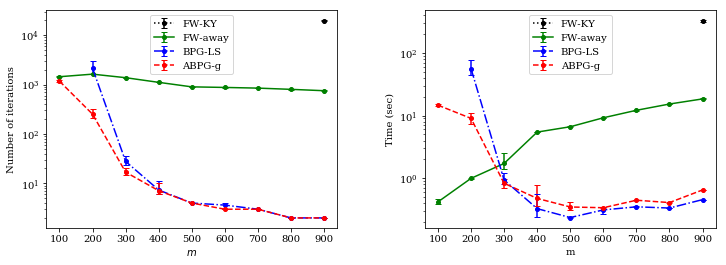

In [16]:
s = '1e-3'

m = np.array(m)
Igem = np.zeros((4,len(m)))
Imax = np.zeros((4,len(m)))
Imin = np.zeros((4,len(m)))
Tgem = np.zeros((4,len(m)))
Tmax = np.zeros((4,len(m)))
Tmin = np.zeros((4,len(m)))

for i in range(4):
    for j in range(len(m)):
        Igem[i,j] = Ieps[s][i,j].prod()**(1.0/K)
        Imax[i,j] = Ieps[s][i,j].max() 
        Imin[i,j] = Ieps[s][i,j].min()
        Tgem[i,j] = Teps[s][i,j].prod()**(1.0/K)
        Tmax[i,j] = Teps[s][i,j].max()
        Tmin[i,j] = Teps[s][i,j].min()

# Plot required number of iterations and time
plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

labels = [r"FW-KY", r"FW-away", r"BPG-LS", r"ABPG-g"]
linestyles = ['k:', 'g-', 'b-.', 'r--']

ax1 = plt.subplot(1,2,1)
for i in range(4):
    idx = np.nonzero(Igem[i] <= Nmax)[0]
    if len(idx) > 0:
        ax1.errorbar(m[idx], Igem[i,idx], yerr=[Igem[i,idx]-Imin[i,idx], Imax[i,idx]-Igem[i,idx]], 
                     fmt=linestyles[i], label=labels[i], marker='o', markersize=4, capsize=3)
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlabel(r"$m$")
ax1.set_ylabel(r"Number of iterations")

ax2 = plt.subplot(1,2,2)
for i in range(4):
    idx = np.nonzero(Igem[i] <= Nmax)[0]
    if len(idx) > 0:
        ax2.errorbar(m[idx], Tgem[i,idx], yerr=[Tgem[i,idx]-Tmin[i,idx], Tmax[i,idx]-Tgem[i,idx]], 
                     fmt=linestyles[i], label=labels[i], marker='o', markersize=4, capsize=3)
ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel(r"m")
ax2.set_ylabel(r"Time (sec)")
